In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# KYPHOSIS MEDICAL ETIOLOGY

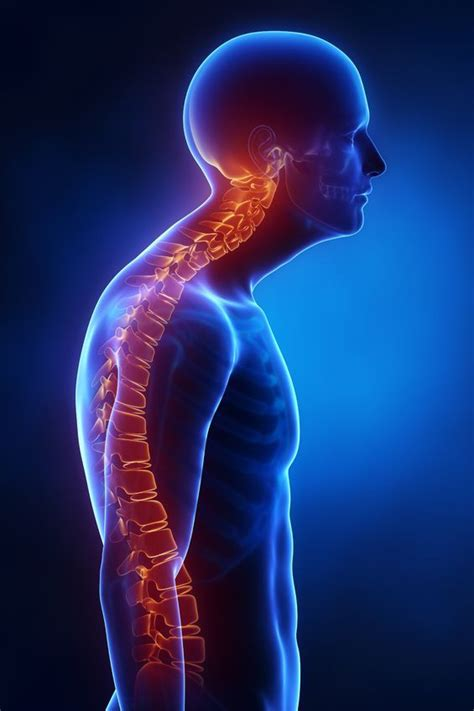

Kyphosis is an exaggerated, forward rounding of the back. A sagittal x-ray will show that rather than the normal rectangular shape, several consecutive vertebrae have a more triangular shape thus creating the curve in the thoracic spine.

In [ ]:
df = pd.read_csv('../input/kyphosis-dataset/kyphosis.csv')

In [ ]:
df.head()

This dataset represents patients who where diagnosed with Kyphosis and had a corrective operation.  The first column "Kyphosis" represents whether the surgery was successful and corrective of the curvature. 
* Was the condition absent or present after the surgery? Represented by "absent" or "present".  This is our target.

* Age is represented in months as this data is pediatric data
* Number is the number of vertebrae operated on during the operation.
* Start is the most superior number in the vertebral column that was operated on.



## EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

In [ ]:
df.isnull().sum().sum()

No null values

In [ ]:
df.describe()

Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [ ]:
sns.pairplot(df,hue='Kyphosis')

We can see our distributions and our correlations

In [ ]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

## TRAIN TEST SPLIT
## TRAIN OUR MODEL WITH A DECISION TREE CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Kyphosis', axis=1)
y=df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:


dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

## LET'S MAKE OUR PREDICTIONS

Let's evaluate how well our decision tree was able to predict whether or not kyphosis is still present in a child based off of the feature columns Age, Number, Start.



In [ ]:
predictions=dtree.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))



Now let's see how these results compare to a random forest model.


## TRAIN OUR MODEL WITH A DECISION TREE CLASSIFIER

In [ ]:
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

In [ ]:
rfc_predictions=rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_predictions))
print(classification_report(y_test, rfc_predictions))

In [ ]:
df['Kyphosis'].value_counts()

Difficult to tell which algorithim did better.  It depends on what we value. Do we value precison or recall and do we value it for absent or present? Probably more important to know if its still present than absent.

Confusion matrix has 1 and 4 mislabelled in decision tree and 2 and 3 mislabelled for random forests.

Unbalanced dataset. Much higher count for absent than present.